In [16]:
import katdal
import numpy as np
import pickle

In [17]:
import time

In [18]:
np.set_printoptions(precision=1,suppress=True)

In [19]:
def target(h):
    h.catalogue.remove('Nothing')
    if len(h.catalogue) >0 :
        tgt=str(h.catalogue.targets[0])[0:12]
    else:
        tgt="Nothing:Bad DATA"
    return tgt

In [20]:
def get_ants(h):
    a_list=[]
    aa=h.file['TelescopeState']['cal_antlist']
    for i,ai in enumerate(aa):
        a_list.append(pickle.loads(ai[1]))
    a_array=np.array(a_list)
    labels=a_array[0]
    return labels

In [21]:
def get_ut(f):
    nn=int(f[-13:-3])
    print nn
    ut=time.asctime(time.gmtime(nn))
    return ut

In [22]:
def phases(h):
    g = h.file['TelescopeState']['cal_product_G']
    g_list = []
    for i, gi in enumerate(g):
        g_list.append(pickle.loads(gi[1]))
    g_array = np.array(g_list)
    HH=g_array[:,0,:]
    VV=g_array[:,1,:]
    HHbefore=np.rad2deg(np.angle(HH)[0])
    HHafter=np.rad2deg(np.angle(HH)[-1])
    VVbefore=np.rad2deg(np.angle(VV)[0])
    VVafter=np.rad2deg(np.angle(VV)[-1])
    return HHbefore, HHafter,VVbefore,VVafter

In [23]:
files=['/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/11/14/1479140918.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/11/14/1479141623.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/11/14/1479167407.h5']

In [24]:
Hphases=Vphases=np.empty([9])

In [25]:
for f in files:
    h=katdal.open(f)
    p=phases(h)
    print get_ut(f), f[-13:-3], target(h)
    print get_ants(h)
    labels=get_ants(h)
    print p[0],"\n",p[1],"\n\n",p[2],"\n",p[3]
    Hnew=np.vstack((Hphases,p[1]))
    Vnew=np.vstack((Vphases,p[3]))
    Hphases=Hnew
    Vphases=Vnew

1479140918
Mon Nov 14 16:28:38 2016 1479140918 PKS 1934-63 
['m001' 'm006' 'm007' 'm008' 'm014' 'm015' 'm025' 'm062' 'm063']
[ 127.1   73.2   74.3  127.3  135.5   90.9   -0.   135.9   92.3] 
[ 127.2   73.3   74.4  127.2  135.6   90.9   -0.   136.5   92.9] 

[  71.2   40.8   87.6  108.4   97.2   68.4    0.    73.    96.5] 
[  71.1   40.9   87.6  108.2   97.3   68.5    0.    73.5   96.9]
1479141623
Mon Nov 14 16:40:23 2016 1479141623 PKS 1934-63 
['m001' 'm006' 'm007' 'm008' 'm014' 'm015' 'm025' 'm062' 'm063']
[ 127.1   73.2   74.3  127.3  135.5   90.9   -0.   135.9   92.3] 
[ 124.5   61.3   65.   121.6  138.3   77.4    0.   136.3   96.4] 

[  71.2   40.8   87.6  108.4   97.2   68.4    0.    73.    96.5] 
[  64.1   36.6   81.7  107.6   80.2   58.4    0.    75.9  107.8]
1479167407
Mon Nov 14 23:50:07 2016 1479167407 PKS 0408-65 
['m001' 'm006' 'm007' 'm008' 'm014' 'm015' 'm025' 'm062' 'm063']
[ 135.7   77.9   89.1  135.3  141.7   97.8    0.   141.6   74.4] 
[ 134.6   89.5   92.1  132.2 -1

In [26]:
labels=get_ants(h)

In [27]:
Hphases[1:]

array([[ 127.2,   73.3,   74.4,  127.2,  135.6,   90.9,   -0. ,  136.5,
          92.9],
       [ 124.5,   61.3,   65. ,  121.6,  138.3,   77.4,    0. ,  136.3,
          96.4],
       [ 134.6,   89.5,   92.1,  132.2, -118.6,   93.7,   -0. ,  139.8,
          92.1]])

In [28]:
Vphases[1:]

array([[  71.1,   40.9,   87.6,  108.2,   97.3,   68.5,    0. ,   73.5,
          96.9],
       [  64.1,   36.6,   81.7,  107.6,   80.2,   58.4,    0. ,   75.9,
         107.8],
       [  87.1,   40.9,   95.3,  112.8,  125.1,   56. ,    0. ,   82.5,
         105.9]])

In [29]:
import matplotlib.pylab as plt
%matplotlib inline

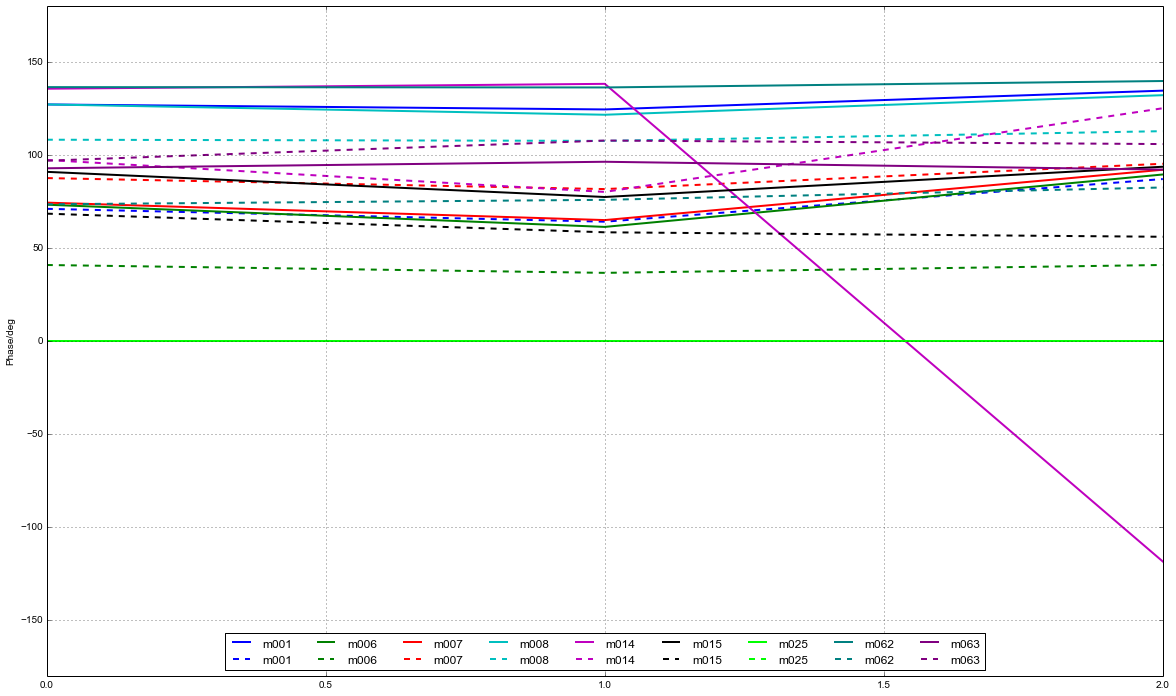

In [30]:
colors=['b','g','r','c','m','k','lime','teal','purple','saddlebrown','grey']
plt.figure(figsize=(20,12))
nants=len(labels)
plt.ylim([-180,180])

for i in range(len(labels)):
    plt.plot(Hphases[1:,i], label=labels[i],color=colors[i],linewidth=2)
    plt.plot(Vphases[1:,i], linestyle='--', label=labels[i],color=colors[i],linewidth=2)
plt.ylabel("Phase/deg")
#plt.xlabel("Time Offset/hours")
plt.legend(loc='lower center',ncol=nants)
plt.grid()